Usando Gauss Legendre, calcular una aproximación de la siguiente integral

$$I=\int _{-\infty} ^{\infty} e^{-x^2} dx $$


a) Representa la función $e^{x^2}$ para $x$ que va de $[−10,10]$ y usa la gráfica para argumentar que

$$ \int _{-\infty} ^{\infty} e^{-x^2} dx = 2\int _{0} ^{\infty} e^{-x^2} dx$$

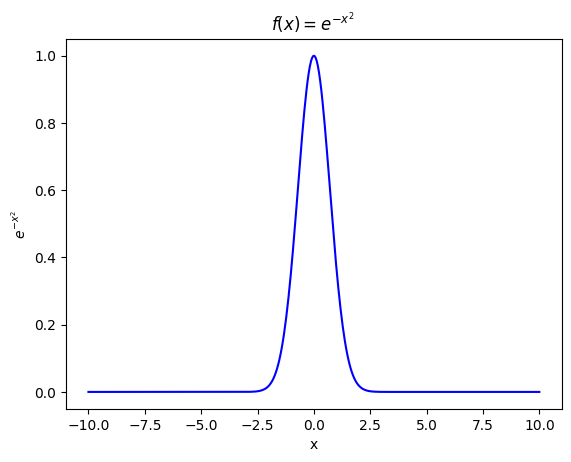

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función e^{-x^2}
def f(x):
    return np.exp(-x**2)

# Valores de x en el intervalo [-10, 10]
x = np.linspace(-10, 10, 400)

# Calcular los valores de la función
y = f(x)

# Graficar la función
plt.plot(x, y, label=r'$e^{-x^2}$', color='blue')

plt.title(r'$f(x)=e^{-x^2}$ ')
plt.xlabel('x')
plt.ylabel(r'$e^{-x^2}$')

plt.show()


En la gráfica podemos podemos observar que es una función simétrica respecto al eje $y$, en el intervalo $[-\infty, 0]$ es igual a $[0, \infty]$, entonces para $f(x)=e^{-x^2}$ en el intervalo $[-\infty , \infty]$ es igual a $2[0, \infty]$

b) Sea $T(n, L)$ la aproximación de la integral
$$2 \int _{0} ^{L} e^{-x^2}$$
calculado por el método de Gauss Legendre utilizando $n$ puntos computacionales. Desarrollar un programa que calcule el valor de $T$ para $n$ y $L$.

In [5]:
import numpy as np
from numpy.polynomial.legendre import leggauss

# Definir la función e^(-x^2)
def f(x):
    return np.exp(-x**2)

n = 10  # Número de puntos computacionales
L = 2.0  # Límite superior de integración

# Función para calcular la integral con el método de Gauss-Legendre
def gauss(f, L, n):
    # Obtener los puntos y pesos de Gauss-Legendre en el intervalo [-1, 1]
    xi, wi = leggauss(n)
    
    # Transformar los puntos xi al intervalo [0, L]
    # x = (L/2) * (xi + 1)
    x_mapped = 0.5 * L * (xi + 1)
    
    # La integral se ajusta con el factor de escala L/2
    integral = 0.5 * L * np.sum(wi * f(x_mapped))
    
    return integral

# Función que calcula T(n, L)
def T(n, L):
    # Calcular la integral en el intervalo [0, L]
    integral_value = gauss(f, L, n)
    
    # Multiplicar por 2 para obtener T(n, L)
    return 2 * integral_value

# Calcular T(n, L)
resultado = T(n, L)
print(f"El valor de T({n}, {L}) es: {resultado}")


El valor de T(10, 2.0) es: 1.7641627815242156


c) Amplíe el programa desarrollado en (b) para escribir valores de $T(n, L)$ en una tabla con filas correspondientes a $n = 100, 200, . . . , 500$ y columnas correspondientes a $L = 2, 4, 6, 8, 10$

In [8]:
import numpy as np
from numpy.polynomial.legendre import leggauss

# Definir la función e^(-x^2)
def f(x):
    return np.exp(-x**2)

# Función para calcular la integral con el método de Gauss-Legendre
def gauss(f, L, n):
    # Obtener los puntos y pesos de Gauss-Legendre en el intervalo [-1, 1]
    xi, wi = leggauss(n)
    
    # Transformar los puntos xi al intervalo [0, L]
    x_mapped = 0.5 * L * (xi + 1)
    
    # La integral se ajusta con el factor de escala L/2
    integral = 0.5 * L * np.sum(wi * f(x_mapped))
    
    return integral

# Función que calcula T(n, L)
def T(n, L):
    # Calcular la integral en el intervalo [0, L]
    integral_value = gauss(f, L, n)
    
    # Multiplicar por 2 para obtener T(n, L)
    return 2 * integral_value

# Valores de n y L
n_values = [100, 200, 300, 400, 500]
L_values = [2, 4, 6, 8, 10]

# tabla de resultados
header = "{:>8} | ".format("n \\ L") + " | ".join([f"{L:>6}" for L in L_values])
separator = "-" * len(header)
print(header)
print(separator)

# Calcular y mostrar T(n, L) 
for n in n_values:
    row = [f"{n:>8}"]  # Comenzamos con el valor de n
    for L in L_values:
        result = T(n, L)
        row.append(f"{result:>6.4f}")  # Formatear el resultado
    print(" | ".join(row))


   n \ L |      2 |      4 |      6 |      8 |     10
-----------------------------------------------------
     100 | 1.7642 | 1.7725 | 1.7725 | 1.7725 | 1.7725
     200 | 1.7642 | 1.7725 | 1.7725 | 1.7725 | 1.7725
     300 | 1.7642 | 1.7725 | 1.7725 | 1.7725 | 1.7725
     400 | 1.7642 | 1.7725 | 1.7725 | 1.7725 | 1.7725
     500 | 1.7642 | 1.7725 | 1.7725 | 1.7725 | 1.7725


d) Amplíe el programa para imprimir también una tabla de los errores en $T(n, L)$ para los mismos valores $n$ y $L$ que en (c). El valor exacto de la integral es $\sqrt{2}$.

In [10]:
import numpy as np
from numpy.polynomial.legendre import leggauss

# Definir la función e^(-x^2)
def f(x):
    return np.exp(-x**2)

# Función
def gauss(f, L, n):
    # Obtener los puntos y pesos de Gauss-Legendre en el intervalo [-1, 1]
    xi, wi = leggauss(n)
    
    # Transformar los puntos xi al intervalo [0, L]
    x_mapped = 0.5 * L * (xi + 1)
    
    # La integral se ajusta con el factor de escala L/2
    integral = 0.5 * L * np.sum(wi * f(x_mapped))
    
    return integral

# Función que calcula T(n, L)
def T(n, L):
    # Calcular la integral en el intervalo [0, L]
    integral_value = gauss(f, L, n)
    
    # Multiplicar por 2 para obtener T(n, L)
    return 2 * integral_value

# Valor exacto de la integral
valor_exacto = np.sqrt(np.pi)

# Valores de n y L
n_values = [100, 200, 300, 400, 500]
L_values = [2, 4, 6, 8, 10]

# Crear la tabla de resultados de T(n, L)
print("Tabla de T(n, L):")
header = "{:>8} | ".format("n \\ L") + " | ".join([f"{L:>6}" for L in L_values])
separator = "-" * len(header)
print(header)
print(separator)

# Calcular y mostrar T(n, L) para cada combinación
T_values = {}
for n in n_values:
    row = [f"{n:>8}"]  # Comenzamos con el valor de n
    for L in L_values:
        result = T(n, L)
        T_values[(n, L)] = result  # Guardamos los valores para la tabla de errores
        row.append(f"{result:>6.4f}")  # Formatear el resultado
    print(" | ".join(row))

#  tabla de errores
print("\nTabla de errores (|T(n, L) - sqrt(pi)|):")
print(header)
print(separator)

# Calcular y mostrar los errores para cada combinación
for n in n_values:
    row = [f"{n:>8}"]  # Comenzamos con el valor de n
    for L in L_values:
        error = abs(T_values[(n, L)] - valor_exacto)  # Error absoluto
        row.append(f"{error:>6.4e}")  # Formatear el error en notación científica
    print(" | ".join(row))


Tabla de T(n, L):
   n \ L |      2 |      4 |      6 |      8 |     10
-----------------------------------------------------
     100 | 1.7642 | 1.7725 | 1.7725 | 1.7725 | 1.7725
     200 | 1.7642 | 1.7725 | 1.7725 | 1.7725 | 1.7725
     300 | 1.7642 | 1.7725 | 1.7725 | 1.7725 | 1.7725
     400 | 1.7642 | 1.7725 | 1.7725 | 1.7725 | 1.7725
     500 | 1.7642 | 1.7725 | 1.7725 | 1.7725 | 1.7725

Tabla de errores (|T(n, L) - sqrt(pi)|):
   n \ L |      2 |      4 |      6 |      8 |     10
-----------------------------------------------------
     100 | 8.2911e-03 | 2.7326e-08 | 1.9762e-14 | 2.8866e-14 | 3.8192e-14
     200 | 8.2911e-03 | 2.7326e-08 | 2.4869e-14 | 3.5527e-14 | 4.5963e-14
     300 | 8.2911e-03 | 2.7326e-08 | 1.2879e-14 | 1.9318e-14 | 2.5091e-14
     400 | 8.2911e-03 | 2.7326e-08 | 9.4147e-14 | 1.3878e-13 | 1.8274e-13
     500 | 8.2911e-03 | 2.7326e-08 | 8.8152e-14 | 1.3167e-13 | 1.7542e-13
